<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os 
import re 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from collections import defaultdict 
from functools import reduce

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 'sales.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 'sales_data_with_stores.csv',
 'sample_data']

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


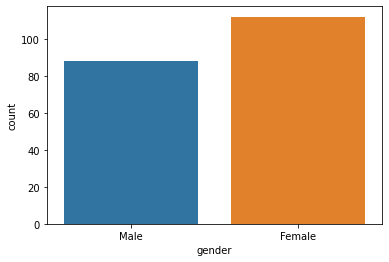

In [5]:
sns.countplot(data = df, x = 'gender')

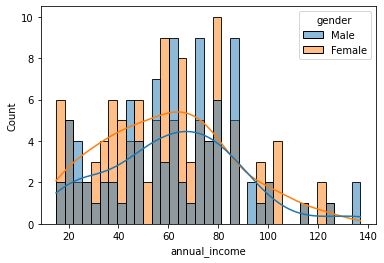

In [7]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 35)

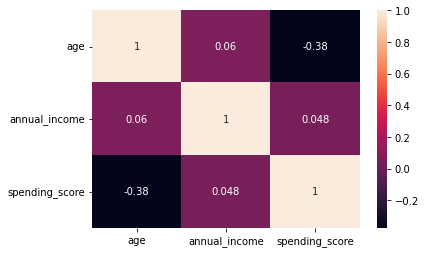

In [10]:
sns.heatmap(data = df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

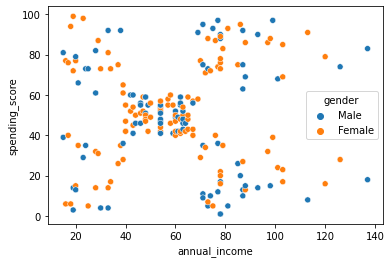

In [12]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [14]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])
km = KMeans(n_clusters=5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


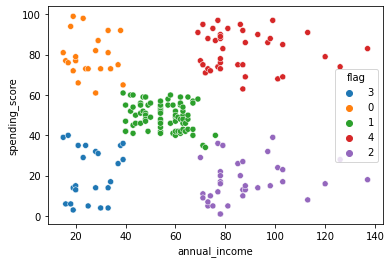

In [15]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

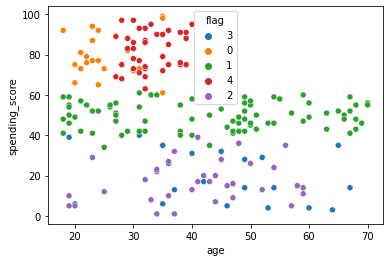

In [16]:
sns.scatterplot(data = df, x = 'age', y = 'spending_score', hue = 'flag')

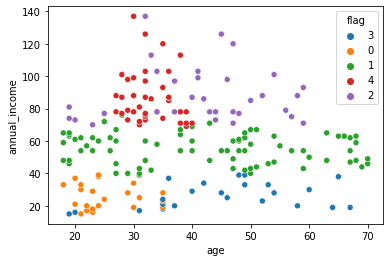

In [17]:
sns.scatterplot(data = df, x = 'age', y = 'annual_income', hue = 'flag')

# Customer Analysis 2

In [18]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 'sales.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 'sales_data_with_stores.csv',
 'sample_data']

In [20]:
df2 = pd.read_csv('sales_vs_discount.csv')
df2.head()

,date,product,sales_amount,discount
0,2021-04-02,1014,261.241,0.0
1,2021-04-03,1014,271.223,0.0
2,2021-04-04,1014,227.140,0.0
3,2021-04-05,1014,203.027,0.0
4,2021-04-06,1014,242.594,0.0


In [22]:
df2['product'].value_counts()

1014    199
Name: product, dtype: int64

In [26]:
df2['date'] = df2['date'].to_numpy().astype('datetime64[D]')
df2['discount_flag'] = np.where(df2['discount'] == 0, 'x', 'o')
df2.head()

,date,product,sales_amount,discount,discount_flag
0,2021-04-02,1014,261.241,0.0,x
1,2021-04-03,1014,271.223,0.0,x
2,2021-04-04,1014,227.140,0.0,x
3,2021-04-05,1014,203.027,0.0,x
4,2021-04-06,1014,242.594,0.0,x


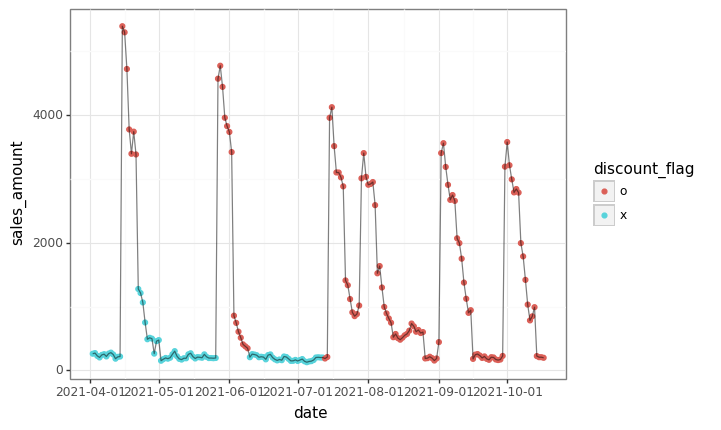

<ggplot: (8776695545109)>

In [31]:
(
    ggplot(df2) +
    gg.geom_point(aes(x = 'date', y = 'sales_amount', color = 'discount_flag')) +
    gg.geom_line(aes(x = 'date', y = 'sales_amount'), alpha = .5) +
    gg.theme_bw()
)

# Iterator

In [41]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3, 3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [43]:
names = np.random.choice(['park', 'kim', 'lee'], 100, replace = True)

def get_score(names) :

  uniques, count = np.unique(names, return_counts=True)
  unique = dict(zip(uniques, count))

  res = list()

  for k, v in unique.items() :
    
    m = np.random.normal(50, 30, 1)
    std = np.abs(np.random.normal(0, 10, 1))

    score = [a if a <= 100 else 100 for a in np.random.normal(m, std, v)]

    temp = pd.DataFrame({'name' : np.repeat(k, v),
                         'score' : score
                         })
    res.append(temp)
  
  return pd.concat(res)

score = get_score(names)
score.head()

,name,score
0,kim,34.558623
1,kim,19.930314
2,kim,47.336760
3,kim,1.211181
4,kim,25.822973


In [44]:
score['name'].value_counts()

park    36
kim     35
lee     29
Name: name, dtype: int64

In [52]:
score = score.assign(flag = score['name'].apply(lambda x : dict(zip(['park', 'kim', 'lee'],range(1,4))).get(x, x)))
score.head()

,name,score,flag
0,kim,34.558623,2
1,kim,19.930314,2
2,kim,47.336760,2
3,kim,1.211181,2
4,kim,25.822973,2


In [54]:
score.groupby(['flag'])['score'].mean().reset_index()

,flag,score
0,1,50.528748
1,2,25.188084
2,3,29.468546
